In [535]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.optimize import curve_fit

In [536]:
path = "P:/SFEM Data/SFEM/2023/2023-11-17/"

In [537]:
# Check if the directory exists
if os.path.exists(path):
    # List the contents of the directory
    contents = os.listdir(path)

    # Print the contents
    print("Contents of the folder:")
    for item in contents:
        print(item)
else:
    print(f"The directory {path} does not exist.")

Contents of the folder:
clamSpectra00001.dat
clamSpectra00002.dat
clamSpectra00003.dat
clamSpectra00004.dat
clamSpectra00005.dat
clamSpectra00006.dat
clamSpectra00007.dat
clamSpectra00008.dat
clamSpectra00009.dat
clamSpectra00010.dat
clamSpectra00011.dat
clamSpectra00012.dat
clamSpectra00013.dat
clamSpectra00014.dat
Nanonis-Session.ini
Si(111)_001.sxm
Si(111)_002.sxm
Si(111)_003.sxm
Si(111)_004.sxm
Si(111)_005.sxm
Si(111)_006.sxm
Si(111)_007.sxm
Si(111)_008.sxm
Si(111)_009.sxm
Si(111)_010.sxm
Si(111)_011.sxm
Si(111)_012.sxm
Si(111)_013.sxm
Si(111)_014.sxm


In [654]:
file = "clamSpectra00003.dat"

In [655]:
file_path = (path + file)

In [656]:
#Initialise a list to store header lines
header_lines = []

# Read the .dat file to find the starting line of the data
with open(file_path, 'r') as file:
    for line_num, line in enumerate(file):
        if "[DATA]" in line:
            start_line = line_num + 1
            break
        header_lines.append(line.strip())

print("Header Info:")
for header_line in header_lines:
    print(header_line)

# Read the data using pandas, skipping rows until the starting line of the data
data = pd.read_csv(file_path, delimiter='\t', skiprows=start_line)
    
# Print the column names in bold without a label
column_names = data.columns.tolist()
print("\033[1m" + ", ".join(column_names) + "\033[0m")

Header Info:
Experiment	CLAMPoints-dat
Date	17.11.2023 12:23:12
User
X (m)	-4.177642E-7
Y (m)	1.982504E-7
Tip Information
Sample material
CLAM Mode	0
Pass Energy (eV)	50.000000
Retarding Ratio	10.000000
Focus Mode	1
Focus (prcnt)	0.600000
Channeltron front (V)	200.000000
Channeltron rear (V)	3600.000000
Integration Time (ms)	100.000000
Loops	1.000000

Energy (eV), Current (A), Tip Current (A), Counter 2 (cps), Bias (V), Z (m)


In [657]:
I = data['Current (A)']
It = data['Tip Current (A)']
V = data['Bias (V)']
E = data['Energy (eV)']
C = data['Counter 2 (cps)']

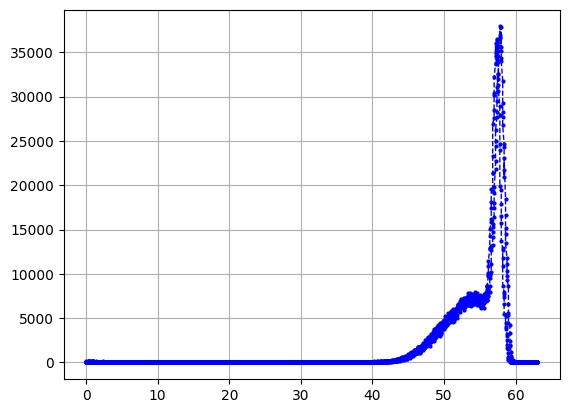

In [658]:
plt.plot(E, C, 'o--' ,color="blue", markersize=2, linewidth=1)
plt.grid(True)

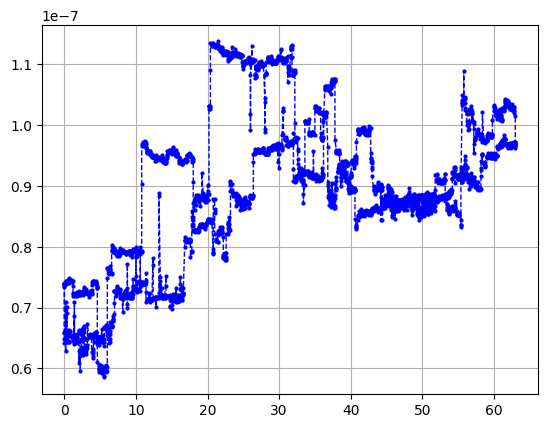

In [659]:
plt.plot(E, I, 'o--' ,color="blue", markersize=2, linewidth=1)
plt.grid(True)

In [660]:
df = pd.DataFrame(data)

# Create a new DataFrame for Forward and Backward values
df_avg = pd.DataFrame()

# Process each column separately
for column in df.columns:
    # Calculate the  Forward and Backward values
    Forward_values = df[column].iloc[:len(df) // 2]
    Backward_values = df[column].iloc[len(df) // 2:][::-1]

    # Create new columns in the DataFrame for  Forward and Backward values
    Forward_column_name = column + ' Forward'
    Backward_column_name = column + ' Backward'
    
    df_avg[Forward_column_name] =  Forward_values.values
    df_avg[Backward_column_name] = Backward_values.values

Forward Columns

In [661]:
I_Forward = df_avg['Current (A) Forward']
It_Forward = df_avg['Tip Current (A) Forward']
V_Forward = df_avg['Bias (V) Forward']
E_Forward = df_avg['Energy (eV) Forward']
C_Forward = df_avg['Counter 2 (cps) Forward']

Backward Columns

In [662]:
I_Backward = df_avg['Current (A) Backward']
It_Backward = df_avg['Tip Current (A) Backward']
V_Backward = df_avg['Bias (V) Backward']
E_Backward = df_avg['Energy (eV) Backward']
C_Backward = df_avg['Counter 2 (cps) Backward']

Normalise with Current

In [663]:
C_For_Norm = C_Forward / I_Forward
C_Back_Norm = C_Backward / I_Backward

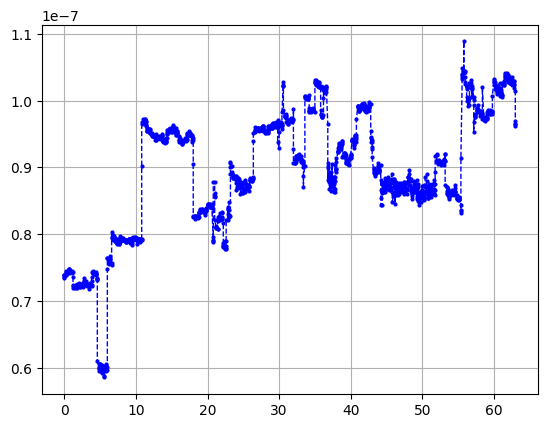

In [664]:
plt.plot(E_Forward, I_Forward, 'o--' ,color="blue", markersize=2, linewidth=1)
plt.grid(True)

Average counts

In [665]:
# Calculate the element-wise average of C_Backward and C_Forward
C_Avg_Norm = (C_Back_Norm + C_For_Norm) / 2

# Save the average_C as a new column in df_avg
df_avg['C_Average'] = C_Avg_Norm


# Calculate the element-wise average of C_Backward and C_Forward
C_Avg = (C_Backward + C_Forward) / 2





In [666]:
#Display the new DataFrame
#print(df_avg)

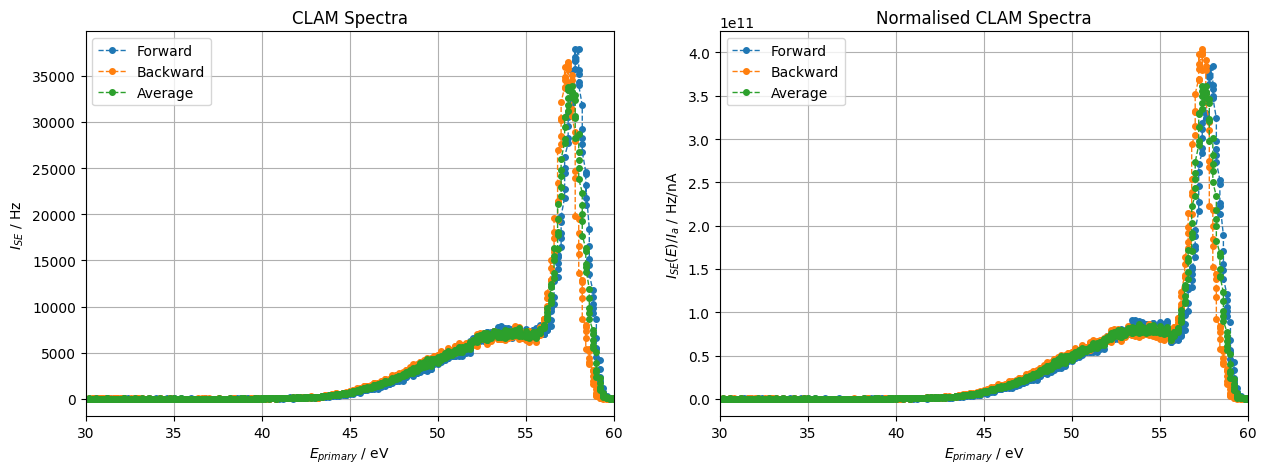

In [667]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)


# Plot C_Forward and C_Backward against E_Forward
ax1.plot(E_Forward, C_Forward, 'o--', markersize=4, linewidth=1, label='Forward')
ax1.plot(E_Forward, C_Backward, 'o--', markersize=4, linewidth=1, label='Backward')
ax1.plot(E_Forward, C_Avg, 'o--', markersize=4, linewidth=1, label='Average' )
#ax1.plot(E, C, 'o--', markersize=4, linewidth=1, label='Forward')
# Set labels and title
ax1.grid(True)
ax1.set_title('CLAM Spectra')
ax1.set_xlabel('$E_{primary}$ / eV')
ax1.set_ylabel('$I_{SE}$ / Hz ')

# Show legend
ax1.legend()


# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [30, 60]  # Example x-axis range
ax1.set_xlim(zoomed_in_x_range)





ax2.plot(E_Forward, C_For_Norm, 'o--', markersize=4, linewidth=1, label='Forward' )
ax2.plot(E_Forward, C_Back_Norm, 'o--',markersize=4, linewidth=1, label='Backward' )
ax2.plot(E_Forward, C_Avg_Norm,'o--', markersize=4, linewidth=1, label='Average' )

# Show legend
ax2.legend()

ax2.grid(True) 
ax2.set_title('Normalised CLAM Spectra')
ax2.set_xlabel('$E_{primary}$ / eV')
ax2.set_ylabel('${I_{SE}(E)} / {I_{a}}$ / Hz/nA ')

# Show the plot
plt.show()




In [668]:
# Locate the elastic peak (peak at the highest energy value)
elastic_peak_index = E_Forward.idxmax()
elastic_peak_energy = E_Forward.loc[elastic_peak_index]




print("Energy loss peak:", elastic_peak_energy)


Index_elastic = C_Avg_Norm.idxmax()
print(Index_elastic)
Elastic_energy = df_avg.loc[Index_elastic, 'Energy (eV) Forward']

df_avg['C_Average']
print("Elastic peak:", Elastic_energy)

# Shift the data to create an energy loss spectrum
energy_loss_spectrum = (E_Forward - Elastic_energy)*-1

Energy loss peak: 63.0
1439
Elastic peak: 57.4


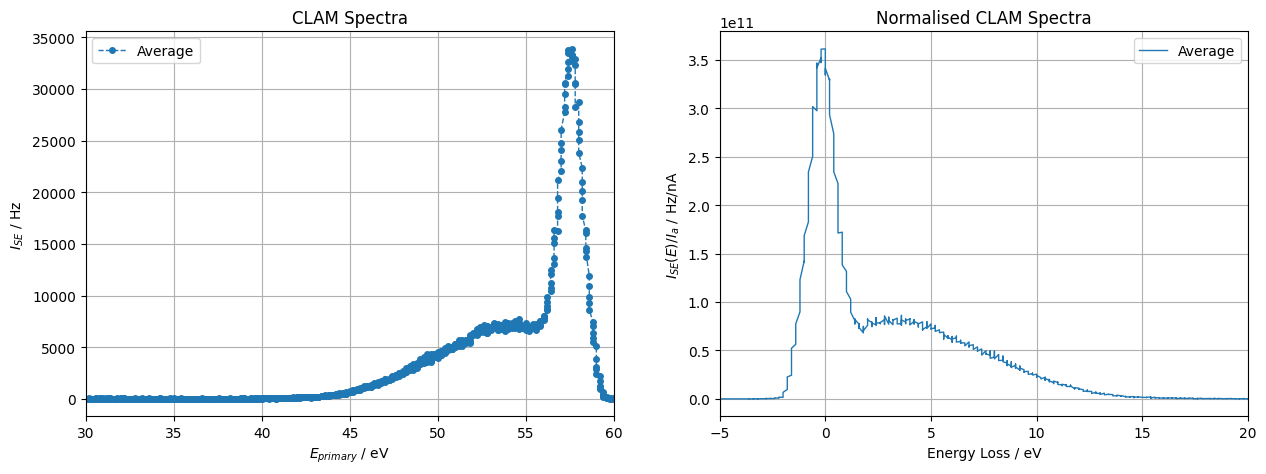

In [740]:
# Plot the spectra
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False)

# Plot original and average spectra
ax1.plot(E_Forward, C_Avg, 'o--', label='Average', markersize=4, linewidth=1)

# Set labels and title for the original spectra
ax1.grid(True)
ax1.set_title('CLAM Spectra')
ax1.set_xlabel('$E_{primary}$ / eV')
ax1.set_ylabel('$I_{SE}$ / Hz ')

# Show legend
ax1.legend()



# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [30, 60]  # Example x-axis range
ax1.set_xlim(zoomed_in_x_range)



# Plot normalized spectra
ax2.plot(energy_loss_spectrum, C_Avg_Norm, markersize=4, linewidth=1, label='Average')

# Set labels and title for the normalized spectra
ax2.grid(True)
ax2.set_title('Normalised CLAM Spectra')
ax2.set_xlabel('Energy Loss / eV')
ax2.set_ylabel('${I_{SE}(E)} / {I_{a}}$ / Hz/nA ')

# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [-5, 20 ]  # Example x-axis range
ax2.set_xlim(zoomed_in_x_range)
# Show legend
ax2.legend()

# Show the plot
plt.show()

Gaussian function has three parameters: A (amplitude), mu (mean or peak position), and sigma (standard deviation or FWHM/2.355).

Bounds_gaussian:

This parameter is a tuple of two arrays, where each array corresponds to the lower and upper bounds for each parameter of the Gaussian function.
In your case, the bounds are set for amplitude (A), mean (mu), and standard deviation (sigma).
The lower bound for amplitude (A) is set to 0 because it cannot be negative. The lower bound for mean (mu) is set to 55, and the lower bound for standard deviation (sigma) is set to 0.
The upper bounds are set to np.inf (infinity) for amplitude (A) because there is no theoretical upper limit for the amplitude. The upper bound for mean (mu) is set to 60, and the upper bound for standard deviation (sigma) is set to infinity.

'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

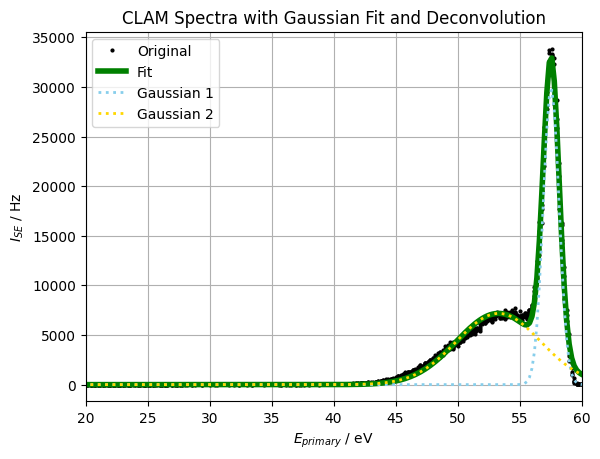

Gaussian 1:
Amplitude: 29788.326734068403
Mean: 57.5485790655223
Sigma: 0.6430968827890854

Gaussian 2:
Amplitude: 7176.616753538584
Mean: 53.304314019821696
Sigma: 3.3959734928661485



In [734]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have E_Forward and C_Avg from your file
# ...

# Define the function to fit (sum of two Gaussians)
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-(x - mean)**2 / (2 * sigma**2))

def double_gaussian(x, amp1, mean1, sigma1, amp2, mean2, sigma2):
    return gaussian(x, amp1, mean1, sigma1) + gaussian(x, amp2, mean2, sigma2)

# Initial guess for the parameters (amplitude, mean, sigma)
initial_guess = [1000, 57.5, 2, 500, 53.5, 4]

# Perform the fit using curve_fit
popt, pcov = curve_fit(double_gaussian, E_Forward, C_Avg, p0=initial_guess)

# Extract the optimized parameters
amp1, mean1, sigma1, amp2, mean2, sigma2 = popt

# Generate the fitted curve using the optimized parameters
fit_curve = double_gaussian(E_Forward, *popt)

# Generate individual Gaussian curves
gaussian1 = gaussian(E_Forward, amp1, mean1, sigma1)
gaussian2 = gaussian(E_Forward, amp2, mean2, sigma2)

# Plot the original data and the fitted curve
plt.plot(E_Forward, C_Avg, 'o', label='Original', markersize=2, color='black')
plt.plot(E_Forward, fit_curve, label='Fit', linestyle='solid', linewidth=4, color="green")

# Plot individual Gaussians
plt.plot(E_Forward, gaussian1, label='Gaussian 1', linestyle=':', linewidth=2, color="skyblue")
plt.plot(E_Forward, gaussian2, label='Gaussian 2', linestyle=':', linewidth=2, color="gold")

# Set labels and title
plt.grid(True)
plt.title('CLAM Spectra with Gaussian Fit and Deconvolution')
plt.xlabel('$E_{primary}$ / eV')
plt.ylabel('$I_{SE}$ / Hz')

# Show legend
plt.legend()

# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [20, 60]  # Adjust as needed
plt.xlim(zoomed_in_x_range)

# Show the plot
plt.show()


# Output the values from the two fitted Gaussian peaks
print("Gaussian 1:")
print(f"Amplitude: {amp1}")
print(f"Mean: {mean1}")
print(f"Sigma: {sigma1}\n")

print("Gaussian 2:")
print(f"Amplitude: {amp2}")
print(f"Mean: {mean2}")
print(f"Sigma: {sigma2}\n")

Find Mean of Gaussian peak to determine new zero loss spectrum:

In [743]:
# Calculate the area under the Gaussian peaks
area1 = amp1 * np.sqrt(2 * np.pi) * sigma1
area2 = amp2 * np.sqrt(2 * np.pi) * sigma2

# Output the areas
print("Area of Gaussian 1:", area1)
print("Area of Gaussian 2:", area2)

Area of Gaussian 1: 48247.21755338584
Area of Gaussian 2: 64429.145877636234


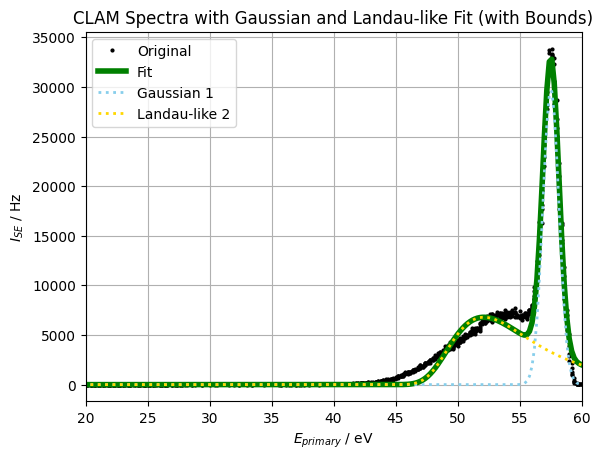

In [744]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit (sum of Gaussian and Landau-like)
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-(x - mean)**2 / (2 * sigma**2))

def landau_like(x, amp, mean, sigma):
    return amp * np.exp(-0.5 * ((x - mean) / sigma + np.exp(-(x - mean) / sigma)))

def mixed_function(x, amp1, mean1, sigma1, amp2, mean2, sigma2):
    return gaussian(x, amp1, mean1, sigma1) + landau_like(x, amp2, mean2, sigma2)

# Initial guess for the parameters (amplitude, mean, sigma)
initial_guess = [1000, 57.5, 2, 500, 53.5, 4]


# Perform the fit using curve_fit with bounds
popt, pcov = curve_fit(mixed_function, E_Forward, C_Avg, p0=initial_guess)

# Extract the optimized parameters
amp1, mean1, sigma1, amp2, mean2, sigma2 = popt

# Generate the fitted curve using the optimized parameters
fit_curve = mixed_function(E_Forward, *popt)

# Generate individual curves
gaussian1 = gaussian(E_Forward, amp1, mean1, sigma1)
landau_like2 = landau_like(E_Forward, amp2, mean2, sigma2)

# Plot the original data and the fitted curve
plt.plot(E_Forward, C_Avg, 'o', label='Original', markersize=2, color='black')
plt.plot(E_Forward, fit_curve, label='Fit', linestyle='solid', linewidth=4, color="green")

# Plot individual curves
plt.plot(E_Forward, gaussian1, label='Gaussian 1', linestyle=':', linewidth=2, color="skyblue")
plt.plot(E_Forward, landau_like2, label='Landau-like 2', linestyle=':', linewidth=2, color="gold")

# Set labels and title
plt.grid(True)
plt.title('CLAM Spectra with Gaussian and Landau-like Fit (with Bounds)')
plt.xlabel('$E_{primary}$ / eV')
plt.ylabel('$I_{SE}$ / Hz')

# Show legend
plt.legend()

# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [20, 60]  # Adjust as needed
plt.xlim(zoomed_in_x_range)

# Show the plot
plt.show()
